In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from joblib import dump, load
import seaborn as sns

In [2]:
df_populars=pd.read_csv('./data/populars.csv')
df_populars=df_populars.set_index('movieId')
df_populars['Others']=df_populars.iloc[:,3:].sum(axis=1)==0
df_populars.info()
df_populars.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24330 entries, 1 to 208737
Data columns (total 23 columns):
title             24330 non-null object
rating numbers    24330 non-null int64
average rate      24330 non-null float64
Action            24330 non-null bool
Adventure         24330 non-null bool
Animation         24330 non-null bool
Children          24330 non-null bool
Comedy            24330 non-null bool
Crime             24330 non-null bool
Documentary       24330 non-null bool
Drama             24330 non-null bool
Fantasy           24330 non-null bool
Film-Noir         24330 non-null bool
Horror            24330 non-null bool
IMAX              24330 non-null bool
Musical           24330 non-null bool
Mystery           24330 non-null bool
Romance           24330 non-null bool
Sci-Fi            24330 non-null bool
Thriller          24330 non-null bool
War               24330 non-null bool
Western           24330 non-null bool
Others            24330 non-null bool
dtypes: bo

,title,rating numbers,average rate,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,...,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,Others
movieId,,,,,,,,,,,,,,,,,,,,,
1,Toy Story (1995),57309,3.893708,False,True,True,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Jumanji (1995),24228,3.251527,False,True,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Grumpier Old Men (1995),11804,3.142028,False,False,False,False,True,False,False,...,False,False,False,False,True,False,False,False,False,False
4,Waiting to Exhale (1995),2523,2.853547,False,False,False,False,True,False,False,...,False,False,False,False,True,False,False,False,False,False
5,Father of the Bride Part II (1995),11714,3.058434,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [3]:
model = load('model.joblib') 

In [4]:
df_ratings_cleaned=pd.read_csv('./data/ratings_cleaned.csv')

In [5]:

for i in df_ratings_cleaned.index:
    uid = df_ratings_cleaned.loc[i,'userId']
    iid = df_ratings_cleaned.loc[i,'movieId']
    predict = model.predict(uid,iid).est-1.0
    df_ratings_cleaned.at[i,'predicted']= predict
df_ratings_predicted=df_ratings_cleaned
df_ratings_predicted['pred-real rating diff']=df_ratings_predicted['predicted']-df_ratings_predicted['rating']
df_ratings_predicted['abs diff']=np.abs(df_ratings_predicted['pred-real rating diff'])
df_ratings_predicted.head()
df_ratings_predicted.to_csv('./data/ratings_predicted.csv')
    

In [6]:
df_ratings_cleaned.info()
df_ratings_cleaned.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24874543 entries, 0 to 24874542
Data columns (total 8 columns):
Unnamed: 0               int64
userId                   int64
movieId                  int64
rating                   float64
timestamp                int64
predicted                float64
pred-real rating diff    float64
abs diff                 float64
dtypes: float64(4), int64(4)
memory usage: 1.5 GB


,Unnamed: 0,userId,movieId,rating,timestamp,predicted,pred-real rating diff,abs diff
0,0,1,296,5.0,1147880044,3.902957,-1.097043,1.097043
1,1,1,306,3.5,1147868817,3.960839,0.460839,0.460839
2,2,1,307,5.0,1147868828,3.904243,-1.095757,1.095757
3,3,1,665,5.0,1147878820,4.003872,-0.996128,0.996128
4,4,1,899,3.5,1147868510,3.753630,0.253630,0.253630


In [7]:
df_users=pd.read_csv('./data/users.csv')
df_users=df_users[df_users['userId'].isin(df_ratings_predicted['userId'])]
df_users.info()
df_users.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 162541 entries, 0 to 162540
Data columns (total 5 columns):
userId           162541 non-null int64
Movie Watched    162541 non-null int64
Highest Rate     162541 non-null float64
Lowest Rate      162541 non-null float64
Average Rate     162541 non-null float64
dtypes: float64(3), int64(2)
memory usage: 7.4 MB


,userId,Movie Watched,Highest Rate,Lowest Rate,Average Rate
0,1,70,5.0,0.5,3.814286
1,2,184,5.0,0.5,3.630435
2,3,656,5.0,2.0,3.697409
3,4,241,5.0,0.5,3.379668
4,5,101,5.0,2.0,3.752475


In [8]:
#20  bad prediction, for give too low ratings
df_ratings_predicted.sort_values('pred-real rating diff').head(20)

,Unnamed: 0,userId,movieId,rating,timestamp,predicted,pred-real rating diff,abs diff
7386715,7423175,48161,5734,5.0,1156291150,0.849044,-4.150956,4.150956
11228308,11293536,73268,1323,5.0,1475285441,0.916992,-4.083008,4.083008
12151562,12223452,79194,2719,5.0,1370453911,0.949522,-4.050478,4.050478
11803331,11872938,76983,6587,5.0,1060799787,0.955374,-4.044626,4.044626
3255978,3269910,21588,1882,5.0,1399803295,1.024527,-3.975473,3.975473
17413775,17507395,113482,1739,5.0,1236564781,1.088766,-3.911234,3.911234
11228307,11293535,73268,1322,5.0,1475285227,1.089396,-3.910604,3.910604
11228309,11293537,73268,1324,5.0,1475286290,1.090539,-3.909461,3.909461
8782387,8823845,57548,193,5.0,1473356207,1.098149,-3.901851,3.901851
16391612,16480432,106897,8830,5.0,1200178768,1.100285,-3.899715,3.899715


In [9]:
#20  bad prediction, for give too high ratings
df_ratings_predicted.sort_values('pred-real rating diff',ascending=False).head(20)

,Unnamed: 0,userId,movieId,rating,timestamp,predicted,pred-real rating diff,abs diff
8677248,8718512,56823,110,0.5,1521758947,5.000000,4.500000,4.500000
19805606,19910031,129440,55814,0.5,1463346337,4.994063,4.494063,4.494063
10052685,10099686,65521,4848,0.5,1488325087,4.959779,4.459779,4.459779
23035427,23153713,150351,4235,0.5,1448873717,4.931067,4.431067,4.431067
10052887,10099888,65521,61240,0.5,1488092652,4.926879,4.426879,4.426879
14756930,14840128,96139,2959,0.5,1573261574,4.919491,4.419491,4.419491
5120259,5145213,33422,318,0.5,1436113586,4.913228,4.413228,4.413228
10053006,10100007,65521,94959,0.5,1488092571,4.910330,4.410330,4.410330
17024507,17116364,110977,7361,0.5,1507465250,4.882558,4.382558,4.382558
5120261,5145215,33422,858,0.5,1436113611,4.878960,4.378960,4.378960


In [10]:
def plotPredDiff(df):
    plt.figure(figsize=(9, 9))
    plt.xticks(np.arange(-5,5, step=0.5))
    plt.title('Distribution of prediction and real rating difference')
    plt.hist(df['pred-real rating diff'],bins=20)
    plt.show()

def plotBox(df):
    sns.boxplot(data=df[['predicted','rating','pred-real rating diff']])

In [11]:
#now for popular movies and heavy users (movies with more than 10000 ratings, and users rated more than 500 times)
PopularMovies = df_populars[df_populars['rating numbers']>=10000].index
df_popular = df_ratings_predicted[df_ratings_predicted['movieId'].isin(PopularMovies)]
df_popular_heavy = df_popular.groupby('userId').filter(lambda x: len(x)>=500)
df_popular_heavy.info()

#popular movies, light users (movies with more than 10000 ratings, users rated less than 10 movies)
df_popular_light = df_popular.groupby('userId').filter(lambda x: len(x)<10)
df_popular_light.info()

#less knownn movies, heavy users (movies with less than 50 ratings, users rated more than 500 movies)
LessKnownMovies = df_populars[df_populars['rating numbers']<50].index
df_lessknown = df_ratings_predicted[df_ratings_predicted['movieId'].isin(LessKnownMovies)]
df_lessknown_heavy = df_lessknown.groupby('userId').filter(lambda x: len(x)>=500)
df_lessknown_heavy.info()

#less knownn movies, light users (movies with less than 50 ratings, users rated less than 10 movies)
df_lessknown_light = df_lessknown.groupby('userId').filter(lambda x: len(x)<10)
df_lessknown_light.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 66522 entries, 245683 to 24870711
Data columns (total 8 columns):
Unnamed: 0               66522 non-null int64
userId                   66522 non-null int64
movieId                  66522 non-null int64
rating                   66522 non-null float64
timestamp                66522 non-null int64
predicted                66522 non-null float64
pred-real rating diff    66522 non-null float64
abs diff                 66522 non-null float64
dtypes: float64(4), int64(4)
memory usage: 4.6 MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 42871 entries, 1691 to 24863595
Data columns (total 8 columns):
Unnamed: 0               42871 non-null int64
userId                   42871 non-null int64
movieId                  42871 non-null int64
rating                   42871 non-null float64
timestamp                42871 non-null int64
predicted                42871 non-null float64
pred-real rating diff    42871 non-null float64
abs diff        

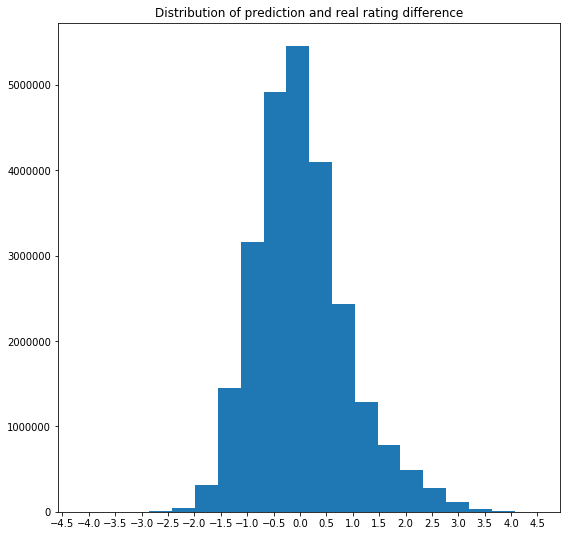

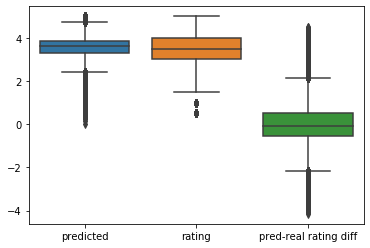

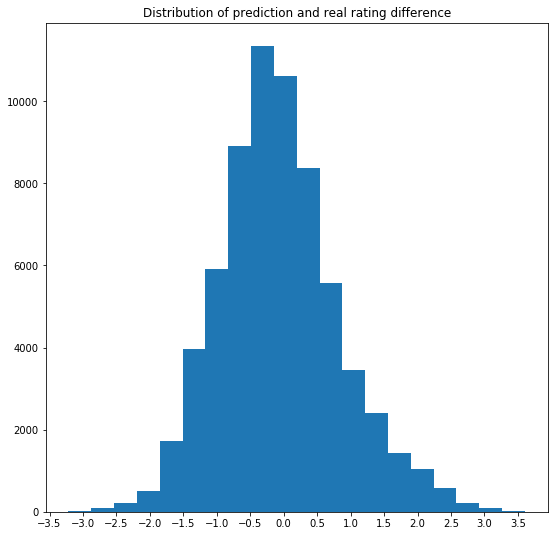

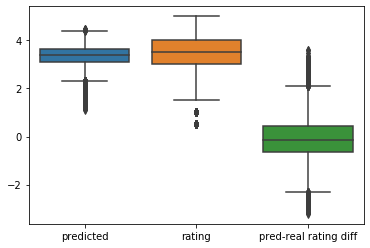

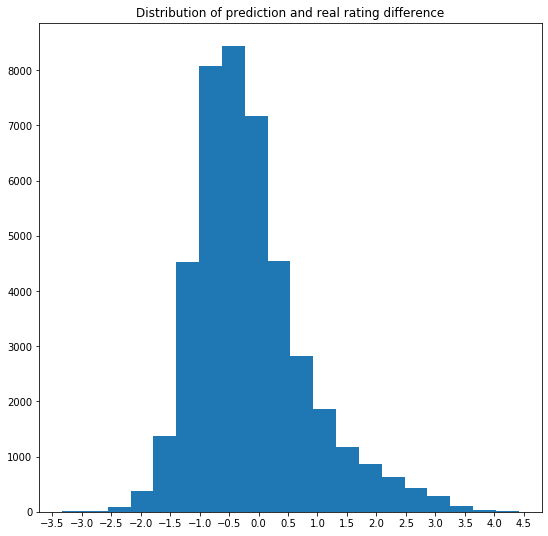

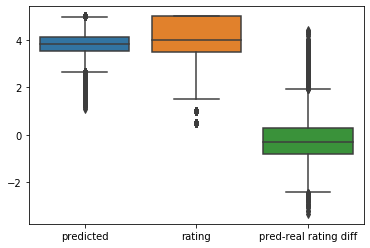

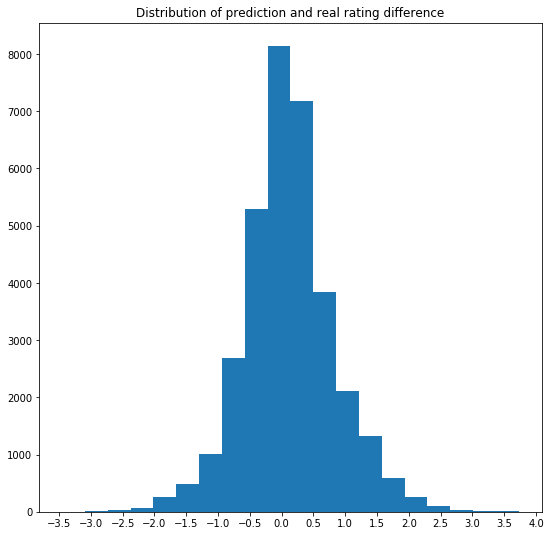

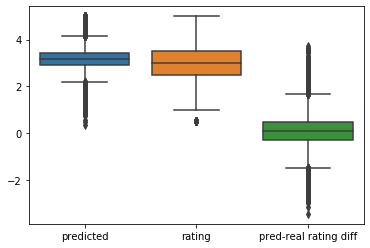

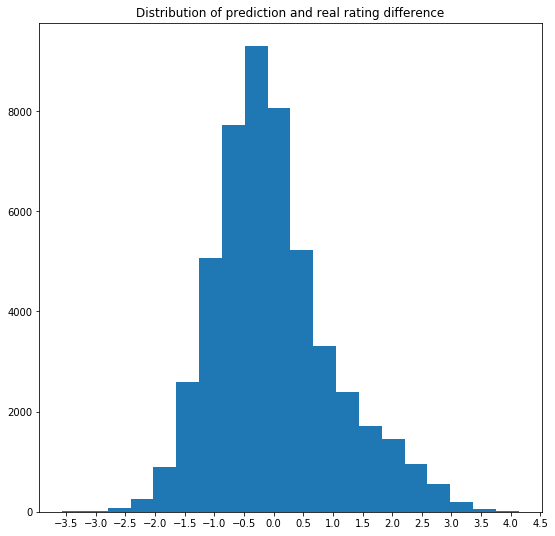

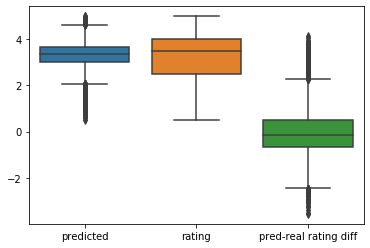

In [12]:
#prediction difference distribution and box diagrams
plotPredDiff(df_ratings_predicted)
plotBox(df_ratings_predicted)

plotPredDiff(df_popular_heavy)
plotBox(df_popular_heavy)

plotPredDiff(df_popular_light)
plotBox(df_popular_light)

plotPredDiff(df_lessknown_heavy)
plotBox(df_lessknown_heavy)


plotPredDiff(df_lessknown_light)
plotBox(df_lessknown_light)


In [13]:
rating_nums=df_ratings_predicted['movieId'].value_counts()

df_populars['average pred rate']=np.nan

average_rates=df_ratings_predicted.groupby('movieId')['predicted'].agg('mean')

for movieid in rating_nums.index:
    df_populars.at[movieid,'average pred rate']=average_rates[movieid]

df_populars.head()

,title,rating numbers,average rate,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,...,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,Others,average pred rate
movieId,,,,,,,,,,,,,,,,,,,,,
1,Toy Story (1995),57309,3.893708,False,True,True,True,True,False,False,...,False,False,False,False,False,False,False,False,False,3.844694
2,Jumanji (1995),24228,3.251527,False,True,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,3.513259
3,Grumpier Old Men (1995),11804,3.142028,False,False,False,False,True,False,False,...,False,False,False,True,False,False,False,False,False,3.303197
4,Waiting to Exhale (1995),2523,2.853547,False,False,False,False,True,False,False,...,False,False,False,True,False,False,False,False,False,3.090970
5,Father of the Bride Part II (1995),11714,3.058434,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,3.259615


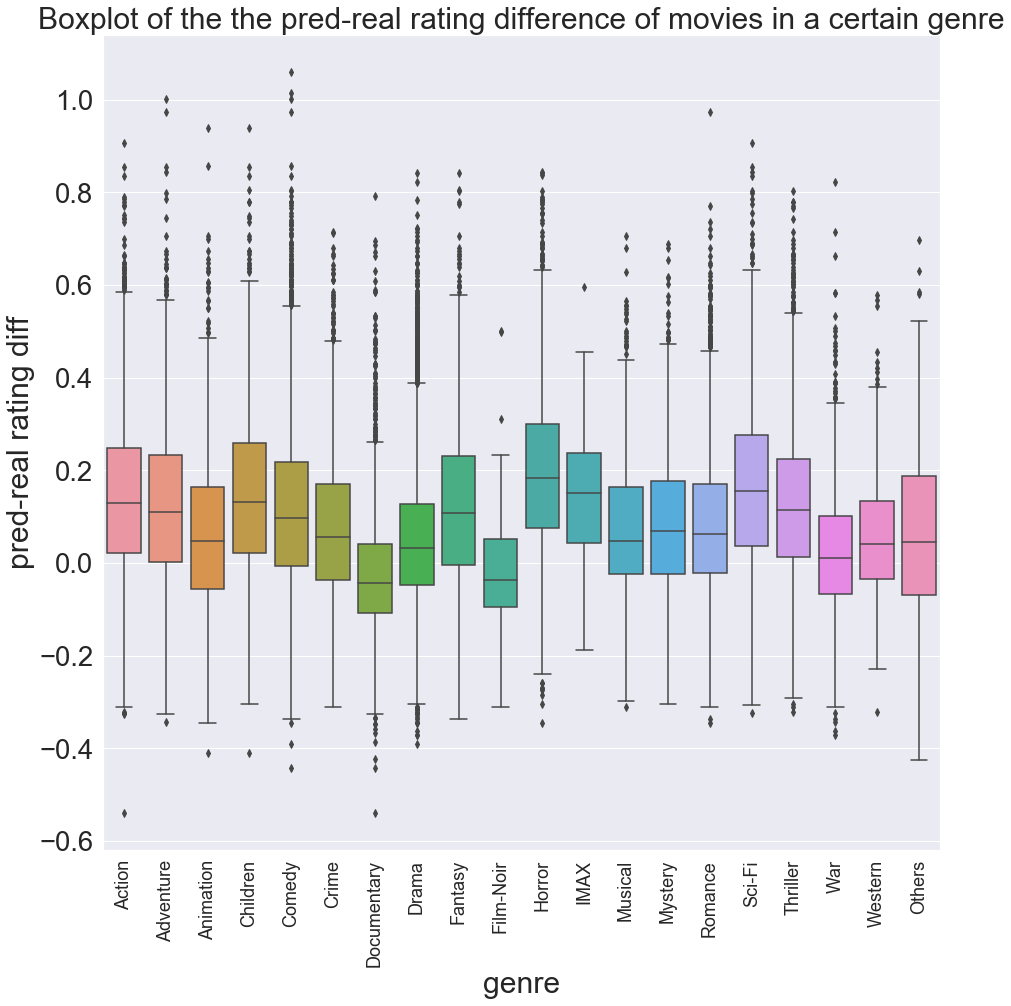

In [14]:
df_populars['pred-real rating diff']=df_populars['average pred rate']-df_populars['average rate']
genres=df_populars.columns[3:-2]

dfdict={}
i=1
for genre in genres:
    dfdict[genre]=df_populars[df_populars[genre]==True].filter(['pred-real rating diff'],axis=1).assign(genre=genre)
    i += 1
    
dflist=[]
for genre in genres:
    dflist.append(dfdict[genre])

cdf = pd.concat(dflist)    
mdf = pd.melt(cdf, id_vars=['genre'])
mdf.head()

sns.set(rc={'figure.figsize':(15,15)},font_scale=2.5)

ax = sns.boxplot(x="genre", y="value", data=mdf)  
ax.set_xticklabels(ax.get_xticklabels(),rotation=90,fontsize = 18)
ax.set(ylabel='pred-real rating diff')
ax.set_title('Boxplot of the the pred-real rating difference of movies in a certain genre')
plt.show()

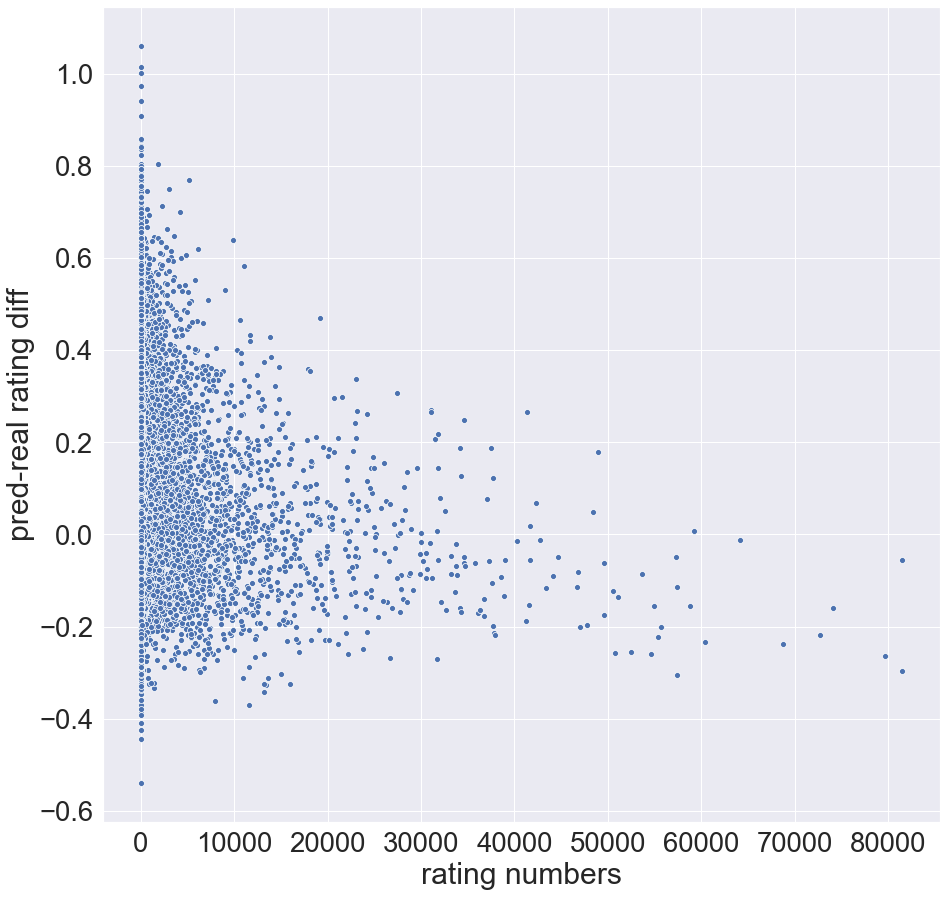

In [15]:
#relation of rating numbers of a movie and its average rating predictionn error
sns.scatterplot(x='rating numbers',y='pred-real rating diff',data=df_populars)

In [16]:
rating_nums=df_ratings_predicted['userId'].value_counts()
df_users=df_users.set_index(['userId'])

df_users['average pred rate']=np.nan

average_rates=df_ratings_predicted.groupby('userId')['predicted'].agg('mean')
average_absdiff=df_ratings_predicted.groupby('userId')['abs diff'].agg('mean')


for movieid in rating_nums.index:
    df_users.at[movieid,'average pred rate']=average_rates[movieid]
    df_users.at[movieid,'average abs diff']=average_absdiff[movieid]
    
df_users['pred-real rating diff']=df_users['average pred rate']-df_users['Average Rate']

df_users.head()

,Movie Watched,Highest Rate,Lowest Rate,Average Rate,average pred rate,average abs diff,pred-real rating diff
userId,,,,,,,
1,70,5.0,0.5,3.814286,3.812015,0.748922,-0.002271
2,184,5.0,0.5,3.630435,3.678297,1.128142,0.047862
3,656,5.0,2.0,3.697409,3.706975,0.357530,0.009567
4,241,5.0,0.5,3.379668,3.489248,0.784201,0.109580
5,101,5.0,2.0,3.752475,3.738990,0.700854,-0.013485


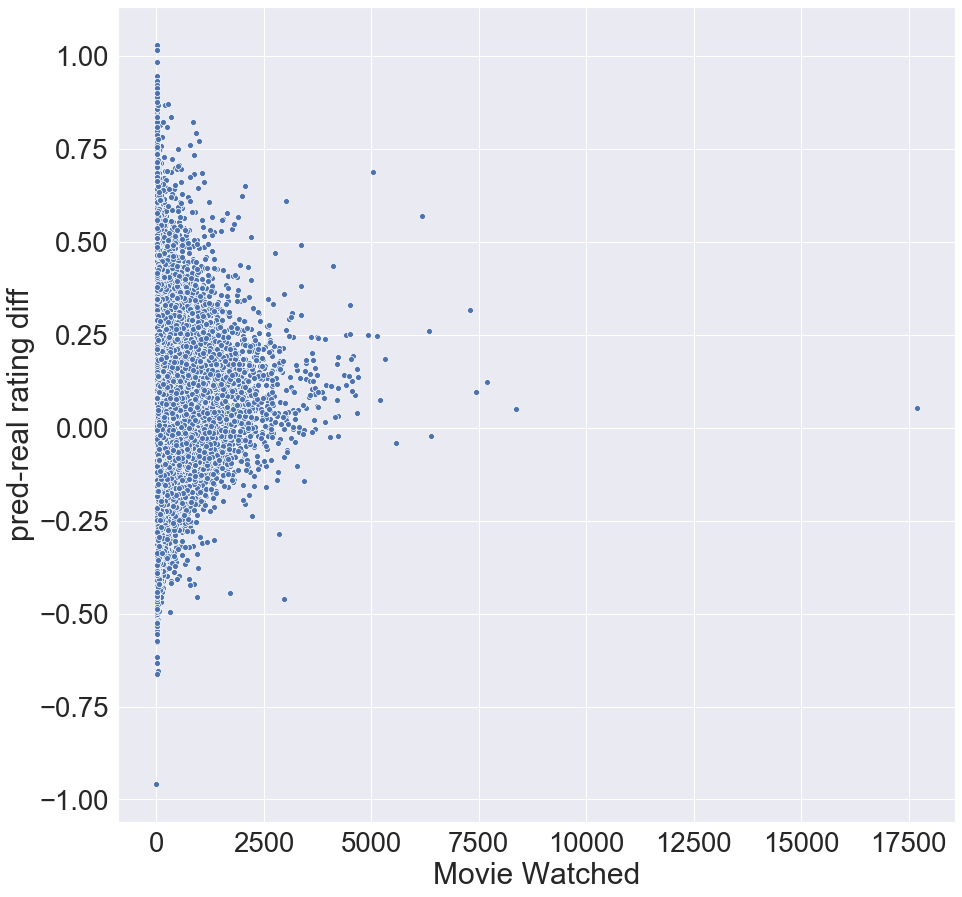

In [17]:
#relation of rating numbers of a user and its average rating prediction error
sns.scatterplot(x='Movie Watched',y='pred-real rating diff',data=df_users)



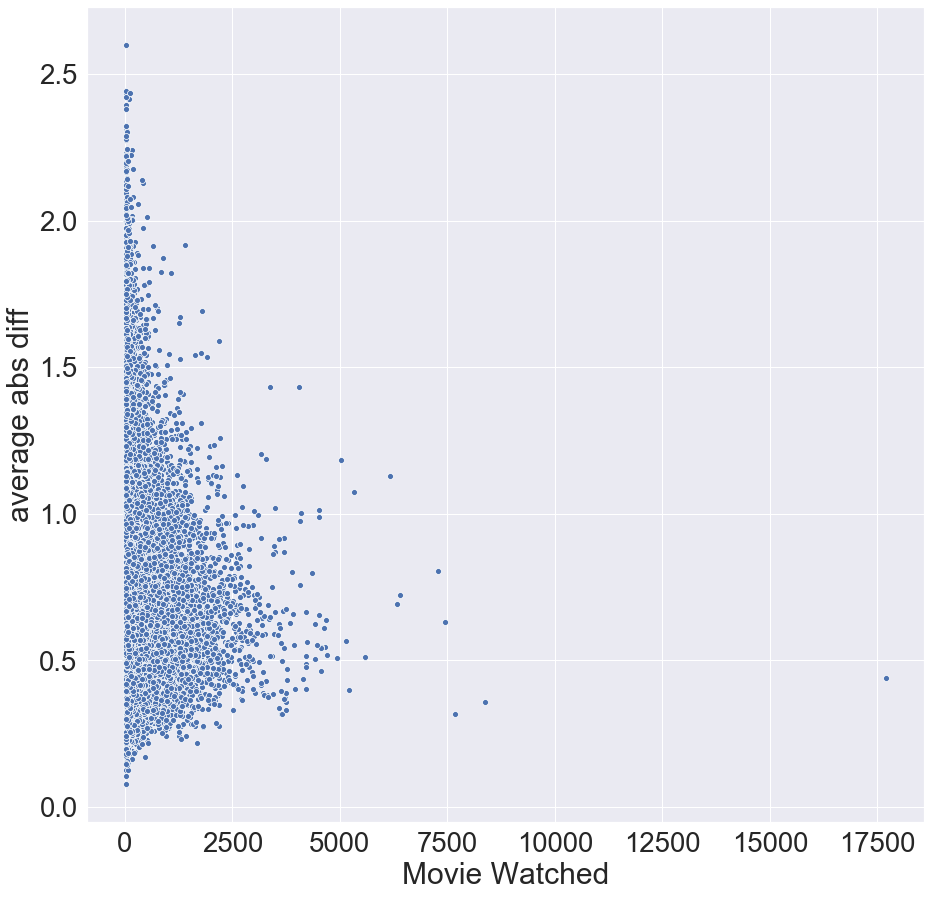

In [18]:
sns.scatterplot(x='Movie Watched',y='average abs diff',data=df_users)

In [19]:
#provide movies for a user based on the recommendation system,
def findUserFavorite(uid,num=10,rated=1):
    '''
    uid: userId,  num: number of movies,   rated: 0 for providing movies unrated, 1 for only rated, other for all
    '''
    df=df_ratings_predicted[df_ratings_predicted['userId']==uid]
    if rated==1:
        df=df.sort_values('predicted',ascending=False)[:num]
        mids=df['movieId'].values
        
        
    elif rated==0:
        mid_tobecheck=df_populars[~df_populars.index.isin(df['movieId'])].index.values
        predictions=[]
        for mid in mid_tobecheck:
            predictions.append(model.predict(uid,mid).est-1)
        temp = pd.DataFrame(columns=['mid','prediction'])
        for i in range(len(mid_tobecheck)):
            temp.at[i,'mid']= mid_tobecheck[i]
            temp.at[i,'prediction']= predictions[i]
        temp = temp.sort_values('prediction',ascending=False)
        mids=temp['mid'].head(num).values
        
        
    elif rated!=0 and rated!=1:
        mid_tobecheck=df_populars.index
        predictions=[]
        for mid in mid_tobecheck:
            predictions.append(model.predict(uid,mid).est-1)
        temp = pd.DataFrame(columns=['mid','prediction'])
        for i in range(len(mid_tobecheck)):
            temp.at[i,'mid']= mid_tobecheck[i]
            temp.at[i,'prediction']= predictions[i]
        temp = temp.sort_values('prediction',ascending=False)
        mids=temp['mid'].head(num).values

    movies=[]
    for mid in mids:
        movies.append(df_populars.loc[mid,'title'])
    return movies

In [20]:
findUserFavorite(1,num=3,rated=2)

['Planet Earth (2006)',
 'The House That Swift Built (1982)',
 'Planet Earth II (2016)']

In [21]:
print(findUserFavorite(1,rated=0))
print(findUserFavorite(1,rated=2))

['Planet Earth (2006)', 'The House That Swift Built (1982)', 'Planet Earth II (2016)', 'Over the Garden Wall (2013)', 'Cosmos', 'Rabbit of Seville (1950)', 'Stalker (1979)', 'O Pátio das Cantigas (1942)', 'Mirror, The (Zerkalo) (1975)', "We Won't Grow Old Together (Nous ne vieillirons pas ensemble) (1972)"]
['Planet Earth (2006)', 'The House That Swift Built (1982)', 'Planet Earth II (2016)', 'Over the Garden Wall (2013)', 'Cosmos', 'Rabbit of Seville (1950)', 'Stalker (1979)', 'O Pátio das Cantigas (1942)', 'Mirror, The (Zerkalo) (1975)', "We Won't Grow Old Together (Nous ne vieillirons pas ensemble) (1972)"]


In [22]:
print(findUserFavorite(1,rated=1))

['Persona (1966)', 'Night, The (Notte, La) (1960)', 'In the Mood For Love (Fa yeung nin wa) (2000)', 'Nights of Cabiria (Notti di Cabiria, Le) (1957)', 'Ran (1985)', 'Winter Light (Nattvardsgästerna) (1963)', 'Through a Glass Darkly (Såsom i en spegel) (1961)', 'Underground (1995)', 'City of God (Cidade de Deus) (2002)', 'Requiem for a Dream (2000)']


In [42]:
def MovieRecommendTo(mid,num=10,watched=False):
    '''
    given movieID (mid), recommend this movie to 10 reviewers, 
    if watched is setting to True, the result include people who already have watched the movie
    '''
    df=pd.DataFrame(columns=['predicted'])
    
    if watched:
        for uid in df_users.index:
            df.at[uid,'predicted']=model.predict(uid,mid).est-1
    else:
        watchedusers=df_ratings_predicted[df_ratings_predicted['movieId']==mid]['userId'].values
        for uid in df_users[~df_users.index.isin(watchedusers)].index:
            df.at[uid,'predicted']=model.predict(uid,mid).est-1
        
        
        
    df=df.sort_values('predicted',ascending=False)
    uids=df.head(num).index
    
    return list(uids)
        
    
    

In [43]:
MovieRecommendTo(296,watched=False)

[139157, 71207, 124934, 96471, 105946, 52924, 97460, 47779, 139526, 156459]

In [44]:
MovieRecommendTo(296,watched=True)

[26659, 126317, 96471, 139157, 47779, 81027, 137690, 137831, 25424, 66426]

In [46]:
df_ratings_predicted.sort_values('rating').head()

,Unnamed: 0,userId,movieId,rating,timestamp,predicted,pred-real rating diff,abs diff
2941588,2953876,19475,173209,0.5,1539365555,2.703068,2.203068,2.203068
3697038,3712630,24549,5171,0.5,1083770132,3.077018,2.577018,2.577018
15400731,15486246,100320,1381,0.5,1143547510,2.196010,1.696010,1.696010
23137054,23255681,151009,4602,0.5,1058673180,2.959320,2.459320,2.459320
11631028,11699984,75830,78207,0.5,1358867344,2.768916,2.268916,2.268916


In [ ]:
df_po